<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Speech-Processing-Recognition-/blob/main/2348505_Lab2(SPR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier Transform and Frequency Spectrum Analysis of Signals**

### **Installing Necessary Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Question 1: Signal Generation and Fourier Transforms

**a)** Generate a basic sinusoidal signal in the time domain. You may generate a sine wave with a frequency of **5 Hz**, sampled at **1000 Hz**.

**b)** Plot the time-domain waveform of the generated signal.

**c)** Compute the **Discrete-Time Fourier Transform (DTFT)** of the signal and plot the **continuous frequency spectrum**.

**d)** Compute the **Discrete Fourier Transform (DFT)** of the signal and plot the **discrete frequency spectrum**.

---


### **a) Signal Generation**

A sinusoidal signal can be mathematically expressed as:
$$
x(t) = A \sin(2 \pi f t)
$$
Where:
- $ A $ is the amplitude,
- $ f $ is the frequency of the signal,
- $ t $ is the time.

For a frequency of $ 5 \, \text{Hz} $ and a sampling rate of $ 1000 \, \text{Hz} $, the signal can be generated over a time duration $ T $ using discrete time points:
$$
t = \frac{n}{f_s}, \quad n = 0, 1, 2, ..., N-1
$$
Where $ f_s = 1000 \, \text{Hz} $ is the sampling frequency, and $ N $ is the total number of samples.


---

In [2]:
# a) Generate a basic sinusoidal signal
f = 5
fs = 1000
T = 1
t = np.arange(0, T, 1/fs)
A = 1
x = A * np.sin(2 * np.pi * f * t)

*The sinusoidal signal is generated with a frequency of 5 Hz and a sampling rate of 1000 Hz. We use `np.sin()` to create the sine wave over a time vector `t`.*


### **b) Plotting the Time-Domain Waveform**

The time-domain waveform is plotted to visualize how the signal behaves over time. This shows the sinusoidal oscillation for a specific duration.

---

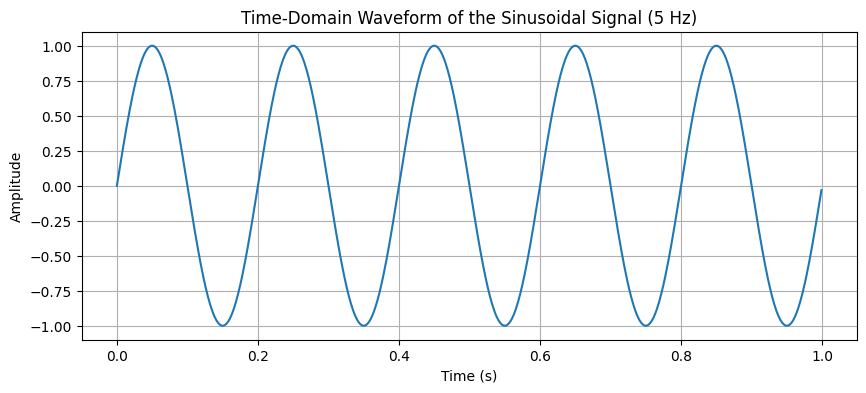

In [3]:
# b) Plot the time-domain waveform of the signal
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title('Time-Domain Waveform of the Sinusoidal Signal (5 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

*I plot the sinusoidal signal using `plt.plot()` to observe the signal in the time domain.*

### **3. Fourier Transforms Overview**

The Fourier Transform converts a time-domain signal into its frequency-domain representation, where it is expressed as a sum of sinusoids at different frequencies.

#### **c) Discrete-Time Fourier Transform (DTFT)**

The DTFT is used to analyze the frequency content of discrete-time signals. Mathematically, the DTFT of a discrete-time signal $ x[n] $ is defined as:
$$
X(\omega) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}
$$
Where:
- $ X(\omega) $ is the continuous frequency spectrum,
- $ x[n] $ is the discrete-time signal,
- $ \omega $ is the angular frequency $ \omega = 2\pi f $.

The DTFT produces a continuous frequency spectrum, providing insight into the frequency components of a signal over all possible frequencies.

---

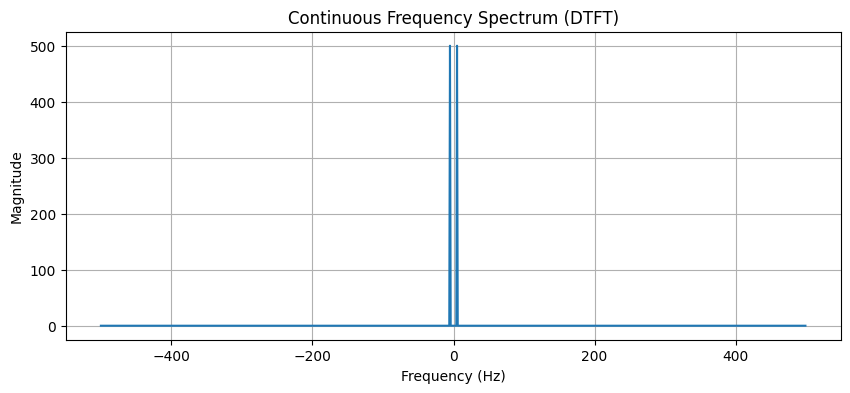

In [4]:
# c) Compute the Discrete-Time Fourier Transform (DTFT)
X_dtft = np.fft.fftshift(np.fft.fft(x))
frequencies_dtft = np.fft.fftshift(np.fft.fftfreq(len(t), 1/fs))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_dtft, np.abs(X_dtft))
plt.title('Continuous Frequency Spectrum (DTFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

*The DTFT is computed using the Fast Fourier Transform (FFT) provided by `np.fft.fft()`. Since the DTFT gives a continuous frequency spectrum, we use `np.fft.fftshift()` to center the zero frequency component. The frequencies corresponding to the DTFT are computed using `np.fft.fftfreq()`.*

### **d) Discrete Fourier Transform (DFT)**

The DFT is used to compute a discrete set of frequency components from a discrete-time signal. It is mathematically expressed as:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} kn}, \quad k = 0, 1, ..., N-1
$$
Where:
- $ X[k] $ is the DFT at the $ k $-th frequency bin,
- $ N $ is the number of points in the signal.

Unlike the DTFT, the DFT provides a discrete set of frequency values and is typically used in numerical computations such as the Fast Fourier Transform (FFT).

---

<ipython-input-5-efd4157a95cc>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)


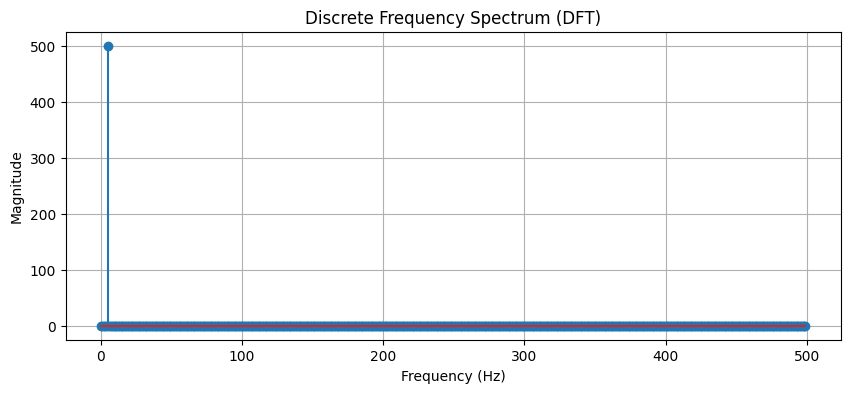

In [5]:
# d) Compute the Discrete Fourier Transform (DFT)
N = len(x)
X_dft = np.fft.fft(x, N)
frequencies_dft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10, 4))
plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

*The DFT is also computed using the FFT. Since the DFT is discrete, we only plot the positive half of the frequency spectrum (`[:N//2]`) for clarity.*

### **Inference**

The results of the Fourier Transform analysis on the sinusoidal signal reveal key characteristics related to the nature of the wave:

1. **Time-Domain Observation**:
   - The time-domain plot shows a clear periodic oscillation, which is a defining feature of a sinusoidal signal. With a frequency of 5 Hz, the waveform completes 5 full cycles in one second, which matches the expected behavior of the signal. The smooth, continuous waveform highlights the harmonic nature of sine waves.

2. **Frequency-Domain Analysis**:
   - The **Discrete-Time Fourier Transform (DTFT)** plot demonstrates a sharp peak at 5 Hz. This peak indicates that the signal contains a dominant frequency component at exactly 5 Hz. The absence of significant frequency components at other values reaffirms that the signal is purely sinusoidal, consisting of a single frequency.
   - The **Discrete Fourier Transform (DFT)** also shows a distinct peak at 5 Hz in the discrete spectrum, further confirming that the signal is dominated by this frequency. The DFT’s ability to resolve the primary frequency component is consistent with the theoretical expectations of a sinusoidal signal.

3. **Harmonic Purity**:
   - Since the sinusoidal signal has only one frequency component (5 Hz), it is considered a "pure tone." The Fourier transforms (both DTFT and DFT) show no other harmonics or additional frequencies, indicating no distortion or noise in the signal. This reflects the simplicity and harmonic purity of the sine wave.


   ---

# Question 2: Composite Signal and Fourier Transforms

**a)** Generate a composite signal by adding two or more sinusoidal signals of different frequencies and amplitudes.

**b)** Plot the time-domain waveform of the composite signal.

**c)** Compute the **Discrete-Time Fourier Transform (DTFT)** and plot the **continuous frequency spectrum**.

**d)** Compute the **Discrete Fourier Transform (DFT)** and plot the **discrete frequency spectrum**.

---



#### **a) Generate a Composite Signal**
In this task, we generate a composite signal by adding two or more sinusoidal signals of different frequencies and amplitudes.

Let’s define the composite signal as a sum of two sinusoids:

$$
x(t) = A_1 \cdot \sin(2\pi f_1 t) + A_2 \cdot \sin(2\pi f_2 t)
$$

Where:
- $ A_1 $ and $ A_2 $ are the amplitudes of the two sinusoidal signals.
- $ f_1 $ and $ f_2 $ are the frequencies of the two signals.
- $ t $ is time.

For example, we can use:
- $ f_1 = 5 \, \text{Hz} $, $ A_1 = 1 $
- $ f_2 = 10 \, \text{Hz} $, $ A_2 = 0.5 $

In [6]:
fs = 1000
T = 1
t = np.arange(0, T, 1/fs)

# Generate two sinusoidal signals
f1 = 5
A1 = 1
signal1 = A1 * np.sin(2 * np.pi * f1 * t)

f2 = 10
A2 = 0.5
signal2 = A2 * np.sin(2 * np.pi * f2 * t)

# a) Generate composite signal
composite_signal = signal1 + signal2

#### **b) Time-Domain Plot**
The time-domain plot of the composite signal will show a combination of both sinusoidal waves. The result is a more complex waveform that reflects the superposition of different frequencies and amplitudes.

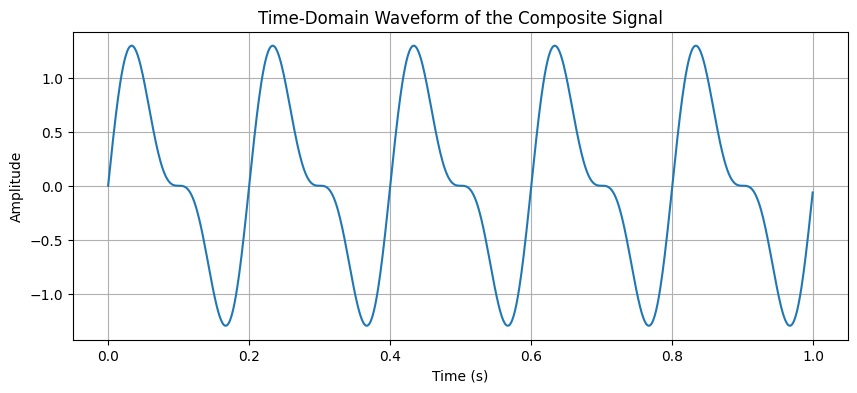

In [7]:
# b) Plot the time-domain waveform of the composite signal
plt.figure(figsize=(10, 4))
plt.plot(t, composite_signal)
plt.title('Time-Domain Waveform of the Composite Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


#### **c) Discrete-Time Fourier Transform (DTFT)**
The **Discrete-Time Fourier Transform (DTFT)** is computed using the formula:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] \cdot e^{-j\omega n}
$$

This produces a continuous spectrum for the signal over frequency. In practice, we compute this for a finite number of samples to approximate the DTFT.

The DTFT gives insight into the frequency components of the composite signal by producing a continuous frequency spectrum that can show the presence of multiple frequencies in the signal.

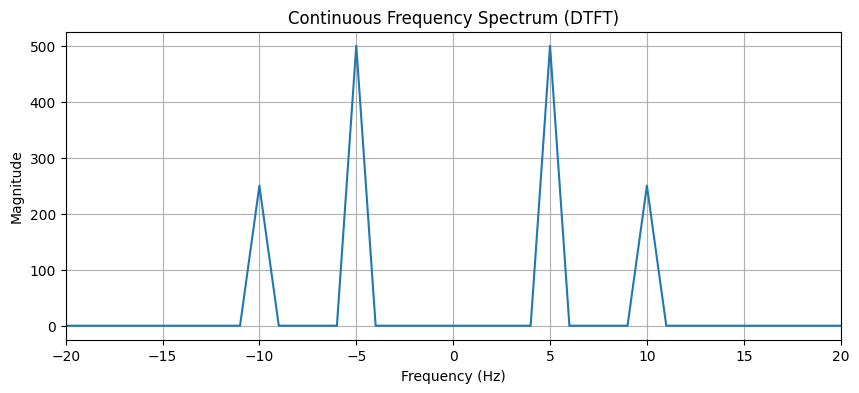

In [9]:
# c) Compute the Discrete-Time Fourier Transform (DTFT)
X_dtft = np.fft.fftshift(np.fft.fft(composite_signal))
frequencies_dtft = np.fft.fftshift(np.fft.fftfreq(len(t), 1/fs))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_dtft, np.abs(X_dtft))
plt.title('Continuous Frequency Spectrum (DTFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)
plt.show()

#### **d) Discrete Fourier Transform (DFT)**
The **Discrete Fourier Transform (DFT)** is computed using:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
$$

Here, $ N $ is the number of discrete samples, $ k $ represents the frequency index, and $ x[n] $ is the composite signal.

Unlike DTFT, the DFT provides a discrete frequency spectrum and is typically computed using the Fast Fourier Transform (FFT) algorithm for efficiency.

---

<ipython-input-10-0f2f8a6491e9>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)


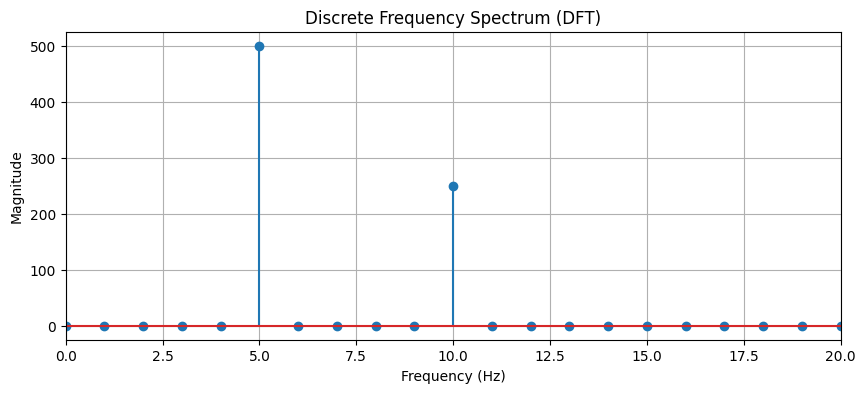

In [10]:
# d) Compute the Discrete Fourier Transform (DFT)
N = len(composite_signal)
X_dft = np.fft.fft(composite_signal, N)
frequencies_dft = np.fft.fftfreq(N, 1/fs)

plt.figure(figsize=(10, 4))
plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### Inference

1. **Time-Domain Analysis**:  
   The time-domain plot of the composite signal shows a more complex waveform than a pure sinusoidal signal. This is due to the interference between the different frequency components (5 Hz and 10 Hz, in this case). The waveform alternates between regions where the two sinusoids constructively and destructively interfere, resulting in variations in amplitude and shape over time.

2. **Frequency-Domain Analysis (DTFT)**:  
   The DTFT reveals two distinct peaks in the continuous frequency spectrum, one at 5 Hz and another at 10 Hz. These peaks correspond to the two frequency components that make up the composite signal. The amplitudes of the peaks also reflect the relative amplitudes of the original sinusoids (i.e., 1 for 5 Hz and 0.5 for 10 Hz). This confirms that the composite signal contains both frequency components.

3. **Frequency-Domain Analysis (DFT)**:  
   The DFT provides a similar insight, with clear peaks at 5 Hz and 10 Hz in the discrete frequency spectrum. However, since the DFT is a sampled version of the Fourier transform, it displays discrete points instead of a continuous curve. Nevertheless, it efficiently captures the key frequency components of the composite signal.

4. **Harmonic Interference**:  
   Both the DTFT and DFT show that the composite signal consists of multiple distinct frequency components without introducing additional harmonics. This suggests that the original sinusoidal signals are simply combined linearly, rather than undergoing nonlinear distortion that would introduce extra frequency components.

   ---

# Question 3: Exponentially Decaying Signal and Fourier Transforms

**a)** Generate an exponentially decaying signal.

**b)** Plot the time-domain waveform.

**c)** Compute the **Discrete-Time Fourier Transform (DTFT)** and plot the **continuous frequency spectrum**.

**d)** Compute the **Discrete Fourier Transform (DFT)** and plot the **discrete frequency spectrum**.

**e)** Analyze the relationship between the time-domain waveform and the frequency-domain representation.

---



#### **a) Generate an Exponentially Decaying Signal**

An exponentially decaying signal can be defined as:

$$
x(t) = A \cdot e^{-\alpha t}
$$

Where:
- $ A $ is the amplitude of the signal (for simplicity, let's take \( A = 1 \)).
- $ \alpha $ is the decay constant, determining how quickly the signal decays.
- $ t $ is time.

In discrete form, the signal becomes:

$$
x[n] = A \cdot e^{-\alpha n T_s}
$$

Where $ T_s $ is the sampling period.

For example, we can choose $ A = 1 $, $ \alpha = 5 $, and sample at 1000 Hz.

---

In [23]:
fs = 1000
T = 1
t = np.arange(0, T, 1/fs)

# a) Generate an exponentially decaying signal
A = 1
alpha = 5
exponential_signal = A * np.exp(-alpha * t)

#### **b) Time-Domain Plot**

The time-domain plot will display an exponentially decaying waveform. As $ n $ increases, the value of $ x[n] $ decreases exponentially.

---

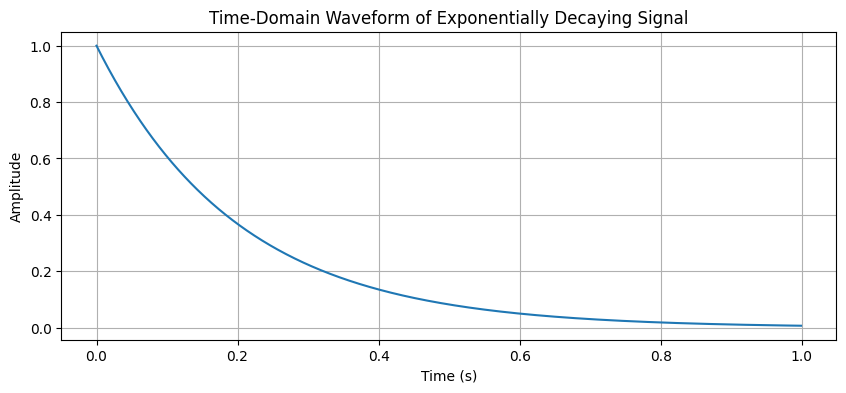

In [24]:
# b) Plot the time-domain waveform of the exponentially decaying signal
plt.figure(figsize=(10, 4))
plt.plot(t, exponential_signal)
plt.title('Time-Domain Waveform of Exponentially Decaying Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### **c) Discrete-Time Fourier Transform (DTFT)**

The **Discrete-Time Fourier Transform (DTFT)** for the exponentially decaying signal can be computed as:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] \cdot e^{-j\omega n}
$$

The DTFT provides a continuous spectrum over all frequencies. Since the signal decays exponentially, the DTFT will show how the signal's energy is distributed over a wide range of frequencies, with more concentration in the lower frequencies.

---

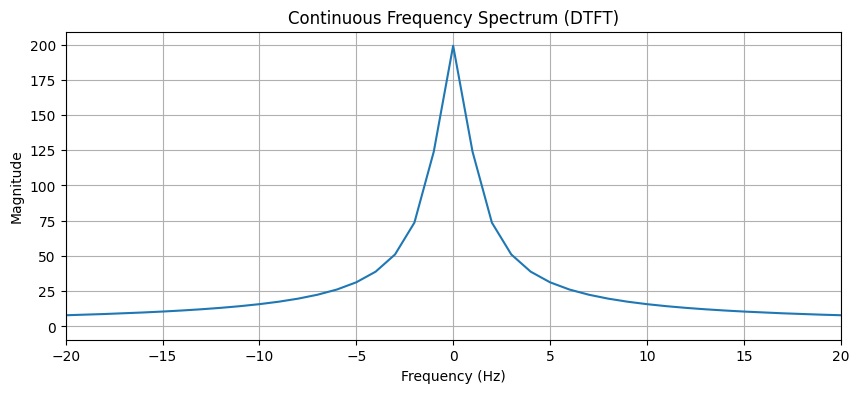

In [14]:
# c) Compute the Discrete-Time Fourier Transform (DTFT)
X_dtft = np.fft.fftshift(np.fft.fft(exponential_signal))
frequencies_dtft = np.fft.fftshift(np.fft.fftfreq(len(t), 1/fs))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_dtft, np.abs(X_dtft))
plt.title('Continuous Frequency Spectrum (DTFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)
plt.show()

#### **d) Discrete Fourier Transform (DFT)**

The **Discrete Fourier Transform (DFT)** is computed using:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
$$

Where $ N $ is the total number of samples. The DFT, as a sampled version of the DTFT, will give a discrete spectrum. The result will also show how the signal's frequency content is spread, with greater emphasis on lower frequencies.

---

<ipython-input-15-d79e34a6f338>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)


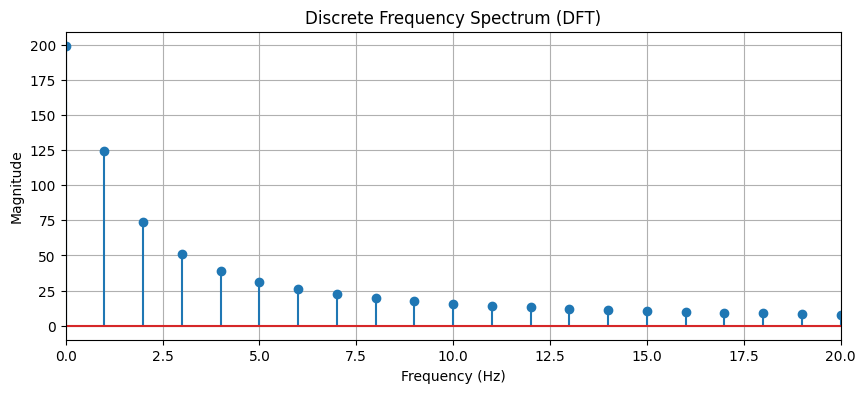

In [15]:
# d) Compute the Discrete Fourier Transform (DFT)
N = len(exponential_signal)
X_dft = np.fft.fft(exponential_signal, N)
frequencies_dft = np.fft.fftfreq(N, 1/fs)

# Plot the DFT (discrete frequency spectrum)
plt.figure(figsize=(10, 4))
plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### Inference

1. **Time-Domain Analysis**:  
   The time-domain plot of the exponentially decaying signal shows a sharp reduction in amplitude as time increases. This behavior is expected due to the negative exponent in the equation, which causes the signal to decay rapidly over time. The signal starts with a higher amplitude and quickly approaches zero.

2. **Frequency-Domain Analysis (DTFT)**:  
   The DTFT of the exponentially decaying signal shows a concentration of energy at lower frequencies. This is because the signal decays gradually in time, meaning its frequency content is largely made up of low-frequency components. The decay introduces some high-frequency components as well, but the majority of the energy remains concentrated in the lower spectrum.

3. **Frequency-Domain Analysis (DFT)**:  
   The DFT produces a discrete spectrum that mirrors the DTFT but with sampled frequency points. The result shows distinct peaks in the low-frequency range, indicating the dominance of lower frequencies in the exponentially decaying signal. As the signal decays in time, the lower frequencies dominate in the DFT, which aligns with the continuous frequency spectrum obtained from the DTFT.

4. **Relationship Between Time-Domain and Frequency-Domain**:  
   The exponential decay in the time domain directly influences the spread of the frequency content. As the signal decays faster, its frequency components are distributed more widely in the spectrum. The higher the decay constant $ alpha $, the more rapid the decay, resulting in a broader frequency spectrum. This showcases the trade-off between time localization (sharp decay) and frequency localization (spread spectrum).

   ---

# Question 4: Rectangular Signal and Fourier Transforms

**a)** Generate a rectangular signal.

**b)** Plot the time-domain waveform.

**c)** Compute the **Discrete-Time Fourier Transform (DTFT)** and plot the **continuous frequency spectrum**.

**d)** Compute the **Discrete Fourier Transform (DFT)** and plot the **discrete frequency spectrum**.

**e)** Analyze the relationship between the time-domain waveform and the frequency-domain representation.

---



#### **a) Generate a Rectangular Signal**

A rectangular signal can be defined as:

$$
x(t) =
\begin{cases}
A & \text{for } 0 \leq t < T \\
0 & \text{otherwise}
\end{cases}
$$

Where:
- \( A \) is the amplitude of the rectangular pulse.
- \( T \) is the duration of the pulse.

In discrete time, the signal can be represented as:

$$
x[n] =
\begin{cases}
A & \text{for } 0 \leq n < N \\
0 & \text{otherwise}
\end{cases}
$$

Where \( N \) corresponds to the number of samples representing the duration \( T \).

---

In [16]:
fs = 1000
T = 1
t = np.arange(0, T, 1/fs)

# a) Generate a rectangular signal
A = 1
pulse_duration = 0.2
rectangular_signal = np.where((t >= 0) & (t < pulse_duration), A, 0)

#### **b) Time-Domain Plot**

The time-domain plot will display a rectangular waveform, characterized by its flat top (with amplitude $ A $) and sharp transitions at $ t = 0 $ and $ t = T $.

---

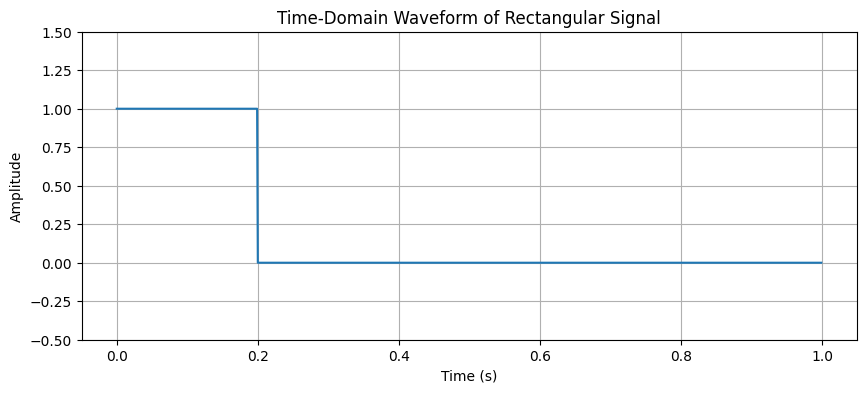

In [18]:
# b) Plot the time-domain waveform of the rectangular signal
plt.figure(figsize=(10, 4))
plt.plot(t, rectangular_signal)
plt.title('Time-Domain Waveform of Rectangular Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.show()

#### **c) Discrete-Time Fourier Transform (DTFT)**

The **Discrete-Time Fourier Transform (DTFT)** for the rectangular signal can be computed as:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] \cdot e^{-j\omega n}
$$

Since the rectangular signal is non-zero for a finite interval, this summation simplifies to:

$$
X(e^{j\omega}) = A \sum_{n=0}^{N-1} e^{-j\omega n}
$$

This results in a sinc function in the frequency domain, representing how the energy of the rectangular signal is spread over frequencies.

---


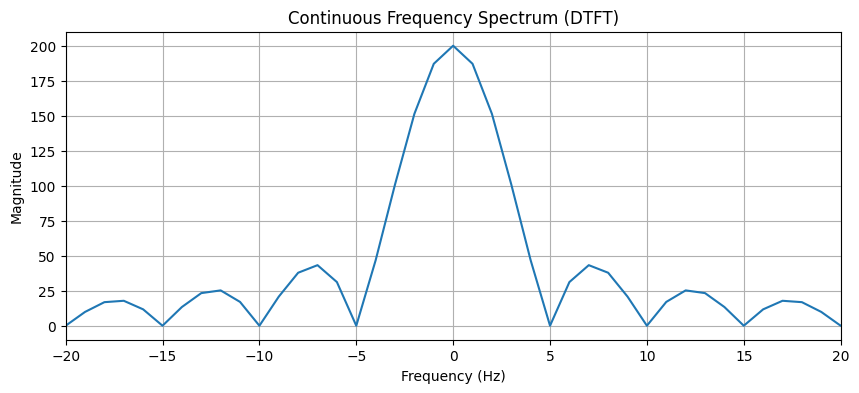

In [19]:
# c) Compute the Discrete-Time Fourier Transform (DTFT)
X_dtft = np.fft.fftshift(np.fft.fft(rectangular_signal))
frequencies_dtft = np.fft.fftshift(np.fft.fftfreq(len(t), 1/fs))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_dtft, np.abs(X_dtft))
plt.title('Continuous Frequency Spectrum (DTFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(-20, 20)
plt.show()

#### **d) Discrete Fourier Transform (DFT)**

The **Discrete Fourier Transform (DFT)** is computed using:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}, \quad k = 0, 1, \ldots, N-1
$$

The DFT will yield discrete frequency values corresponding to the rectangular signal. The frequency content of the rectangular pulse will also appear as a sinc function, with lobes that diminish in amplitude away from the center frequency.

---

<ipython-input-25-89451d98ebdf>:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)


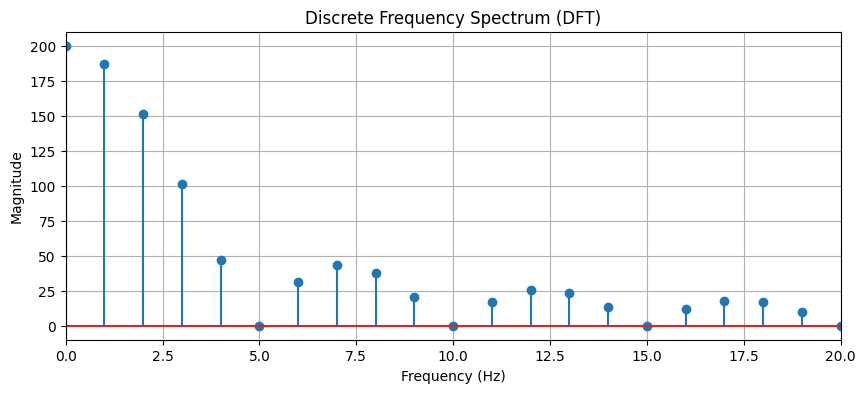

In [25]:
# d) Compute the Discrete Fourier Transform (DFT)
N = len(rectangular_signal)
X_dft = np.fft.fft(rectangular_signal, N)
frequencies_dft = np.fft.fftfreq(N, 1/fs)

# Plot the DFT (discrete frequency spectrum)
plt.figure(figsize=(10, 4))
plt.stem(frequencies_dft[:N//2], np.abs(X_dft[:N//2]), use_line_collection=True)
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### Inference

1. **Time-Domain Analysis**:  
   The time-domain plot of the rectangular signal displays a constant amplitude over a specified duration \( T \), with clear transitions from zero to \( A \) and back to zero. This characteristic signifies the pulse nature of the signal.

2. **Frequency-Domain Analysis (DTFT)**:  
   The DTFT of the rectangular signal yields a sinc function in the frequency domain. This is indicative of how the rectangular signal, while having a finite duration in the time domain, spreads its energy across a range of frequencies. The main lobe of the sinc function represents the primary frequency components, while the side lobes demonstrate the contribution of higher harmonics.

3. **Frequency-Domain Analysis (DFT)**:  
   The DFT produces a discrete representation of the frequency content of the rectangular signal. Similar to the DTFT, the DFT also results in a sinc-like shape in the frequency spectrum, showing how the finite duration of the rectangular pulse introduces various frequency components. The resolution in the frequency domain is dependent on the length of the signal, with longer signals yielding a finer frequency resolution.

4. **Relationship Between Time-Domain and Frequency-Domain**:  
   The rectangular nature of the time-domain signal results in a sinc function in the frequency domain. The sharp transitions in the rectangular signal correspond to the oscillations of the sinc function, demonstrating how time localization (sharp edges) leads to frequency spread. This trade-off reflects the fundamental principles of the Fourier Transform, emphasizing that signals confined in time have broader frequency representations.

---
